In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from collections import Counter
import tqdm
import jieba

In [2]:
data = pd.read_csv('demo.txt', encoding='utf-8', sep="\t")

In [3]:
data.shape

(7117, 3)

In [4]:
data.head()

,order_id,rate_detail,rate_num
0,5.770000e+17,不走高速，多坐了一个多小时的路程，一次很不愉快的旅程！,1
1,5.770000e+17,开车稳稳得！新车第一次做啊。期待下次合作！,3
2,5.770000e+17,师傅人真的超好！非常有礼貌，也很健谈！期待再次同行！,3
3,5.770000e+17,超载加超车，加绕路，真是醉了，脾气也不好，不敢坐了，好怕怕，拐进村子里，黑漆漆的,1
4,5.770000e+17,帮亲戚叫的车，几十块钱电话打几个来吹，都说了忙完了马上确认，要是有时间我不会自己送还打什么车？,1


In [5]:
data['lens'] = data['rate_detail'].apply(lambda x:x.strip()).apply(lambda x:len(x))

In [6]:
data = data[data['lens']>=20]
data.shape

(7110, 4)

In [7]:
pos = data[data['rate_num']=='3'][['rate_detail']]
pos.reset_index(inplace=True, drop=True)
neg = data[data['rate_num']!='3'][['rate_detail']]
neg.reset_index(inplace=True, drop=True)

In [8]:
pos.shape, neg.shape

((3226, 1), (3884, 1))

In [9]:
pos.head()

,rate_detail
0,开车稳稳得！新车第一次做啊。期待下次合作！
1,师傅人真的超好！非常有礼貌，也很健谈！期待再次同行！
2,感谢，感谢，又送了我一段路程，期待下次相遇
3,谁坐谁赚到哇！小哥哥不仅帅人也超好！ps.钟经理给了好座位还送小吃！谢谢谢谢谢谢谢啦！
4,提前到了，还愿意等，因为要做肩颈理疗所以拖迟了一会，师傅非常耐心等着，很棒


In [10]:
neg.head()

,rate_detail
0,不走高速，多坐了一个多小时的路程，一次很不愉快的旅程！
1,超载加超车，加绕路，真是醉了，脾气也不好，不敢坐了，好怕怕，拐进村子里，黑漆漆的
2,帮亲戚叫的车，几十块钱电话打几个来吹，都说了忙完了马上确认，要是有时间我不会自己送还打什么车？
3,没有在定位处等待，直接开走了，然后打电话给我说没看到我人就开走了，让他开回来很不情愿，上车后...
4,未到达目的地 想让我下车自己走过去 还有一大段路 我没有妥协！一个小女生拿着28寸的大行李箱...


In [11]:
pos.to_csv('pos.txt', index=False, header=False)
neg.to_csv('neg.txt', index=False, header=False)
# 保存正负样本数据

In [12]:
with open ('stopwords.txt', 'r') as f:
    stopwords = f.read()
stopwords = stopwords.split("\n")

In [13]:
len(stopwords), stopwords[:10]

(1018, ['$', '0', '1', '2', '3', '4', '5', '6', '7', '8'])

In [14]:
# 定义读函数，读入文本文件，并分词
def read(file):
    pos_sentence = []
    with open (file, 'r') as f:
        pos_text = f.read()
    pos_s = pos_text.split("\n")
    for s in pos_s:
        a = jieba.cut(s)
        temp = []
        for i in a:
            if i not in stopwords:# 判断是否是停用词
                 temp.append(i.strip())
        pos_sentence.append(' '.join(temp))
    return '\n'.join(pos_sentence)


In [15]:
# 加载正/负评论数据
pos_words = read('pos.txt')
neg_words = read('neg.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/2w/tt1p_4td3yq9xlbl7c2t4jn00000gn/T/jieba.cache
Loading model cost 4.286 seconds.
Prefix dict has been built succesfully.


In [16]:
pos_words

'开车 稳稳 新车 第一次 做 期待 下次 合作\n师傅 真的 超好 非常 礼貌 健谈 期待 再次 同行\n感谢 感谢 送 一段 路程 期待 下次 相遇\n坐 赚 哥哥 帅人 超好 ps 钟 经理 座位 送 小吃 谢谢 谢谢 谢谢 谢\n提前 愿意 做 肩颈 理疗 拖迟 一会 师傅 非常 耐心 很棒\n司机 差 几分钟 不能 拼车 司机 接 单\n师傅 非常 老人 钱包 落 车上 师傅 特意 送 过去 拾金不昧 大大的 赞\n今晚 居然 拼车 成功 省 10 几蚊 元宵节 快乐\n司机 热情 聊天 东西 落 车上 热心 帮 送 回来 非常感谢 t ︶ ` s\n师傅 超级 好久 木有 脾气 礼貌 健谈\n车 主人 超级 将近 10 分钟 提醒 我出 站 厅 很多 电动车 小心 点 注意安全 觉得 很暖心 谢谢 期待 下次 继续 打到 车\n哥哥 我加 微信 是不是 不要 钱 看到 快加 微信 微信 加不上\n朋友 说 聊 一路 旁听者 感觉 司机 和蔼可亲 可爱 好人\n非常 东西 很多 师傅 帮忙 搬 尽量 腾出 更 空间 放 箱子\n车牌 666 车 主人 666 期待 下次 同行 感谢 送到 家\n非常 棒 手机 没 电 师傅 耐心 等待 露宿 火车站\n哥哥 特别 本来 不用 送 进 学校 主动 送 进去 人超 期待 再次 同行\n不错 车主 第一次 做 宝马 顺风 车 有缘\n飞机 晚点 感谢 师傅 久 车技 期待 再次 同行\n谢谢 顺风 车 老大 哥哥 热情周到 准时到达 目的地 一个 好心肠 老大哥 感谢 一路上 陪伴 希望 下次 机会 相遇\n期待 下次 同行 车 主人 帅哥 一枚\n车主 人帅帅 一路 只顾 打游戏 没 聊天 主动 找人 聊天 全 分\n姐姐 nice 性格 一路上 愉快\n师傅 客气 热情 服务 期待 下次 同行\n一路 畅聊 中途 逛 高速公路 开天窗 感受 一路 暖风 咨询 买车 细节 有问必答 特别 友善 可爱\n司机 服务 周到 准时 下次 一定 找\n师傅 一百个 五星 好评 师傅 心态 太 年轻 特别 幽默 太 好玩 赞\n司机 师傅 下次 机会 希望 坐 一次\n弟弟 车 孩子 走 磨蹭 迟到 好几分钟 车主 半天 实在 不好意思 谢谢 车主 耐心\n五个 赞 态度 超级 棒 神 准时 驾驶 平稳 不失 速度 希望

In [17]:
neg_words

'走 高速 坐 一个多 小时 路程 一次 愉快 旅程\n超载 加 超车 加 绕路 真是 醉 脾气 不好 不敢 坐 怕怕 拐进 村子 里 黑漆漆\n帮 亲戚 车 几十块 钱 电话 几个 吹 说 忙 完 马上 确认 时间 不会 送还 车\n没有 定位 处 等待 直接 开走 打电话 说 没 看到 我人 开走 开 回来 情愿 上车 一直 说 责任 骂 说 顺风 车 过来 接 已经 不错 争辩 直接 下车 外面 大雨 没有 伞\n未 到达 目的地 想 下车 走 过去 一大 段路 没有 妥协 一个 小女生 28 寸 行李箱 下来 帮帮忙\n坦诚 告诉 乘客 想法 尊重 心态 沟通\n车牌 符合 坐 舒服 省 10 多块 高速 费 半个 钟 车程 硬 走 一个半 钟\n太 年轻 一年 驾龄 高速 昌河 面包 时速 120\n逆行 人生 第一次 搭车 逆行 提醒 知道\n开 慢 迟到 二十分钟 打个 电话 说声\n迟到 严重 10 分钟 特别 讨人厌 好不好\n多个 软件 拼车 接单 实际 拼车 确 未 拼车 成功 支付 金额\n车 有人 服务态度 欠佳 带 嘲笑 语气\n优享 车 开 一辆车 根本 配不上 优享 钱\n害 迟到 扣 一百 75 公里 跑 四个 小时 赶时间 最早 上车 蓬江区 差不多 距离 送 最迟 上车 先回\n素质 太 差 做 快车 顺风 车 带绕 小大圈 嘴巴 太老\n赚 几十块 钱 害 受罪 自私自利 钱 不择手段\n距离 两分钟 围绕 我开 半个 小时 接到 多次 压 道路 分隔线 行驶 多次 闯红灯 开车 状态 极其 不好 人身安全 极其 不负责任 感觉 喝酒 精神 不好\n司机 差劲 收钱 骗人 拼 四个 人用 两个 手机 真的 差劲 严重 投诉 司机 开车 五点 半 七点 出发 没见 差劲 希望 滴滴 公司 好好 整合 一下\n司机 大哥 真的 火车 延迟 好久 疯狂 call\n司机 超 好人 元宵 肯载 买 汤圆 礼貌 准时\n车里 臭 抹布 味儿 开车 贼 慢贼 肉 坐 令人 烦躁\n明明 带 拼车 乘客 未 走 平台 多收 钱\n感觉 快 晕车 一会 来个 刹车 过会\n走 错路位 送到 终点 车内 全是 酒气 私下 拼 一个\n态度 不好 脑子 有病 话 说 利落 一脚 急刹车 没到 指定 位置 接\n拼车 拼 晚 四十五分钟 没 看见 

In [16]:
with open('pos_words.txt', 'w') as f:
    f.write(pos_words)
with open('neg_words.txt', 'w') as f:
    f.write(neg_words)
with open('posneg_words_split.txt', 'w') as f:
    f.write(pos_words + '\n' + neg_words)
f.close()

In [17]:
print(len(pos_words), len(neg_words))

101167 162167


In [18]:
from gensim.models.doc2vec import Doc2Vec, LabeledSentence
from sklearn.cluster import KMeans
import gensim
TaggededDocument = gensim.models.doc2vec.TaggedDocument

In [20]:
traindata_df = pd.read_csv('posneg_words_split.txt', names=['comm'])
traindata_df['lens'] = traindata_df.apply(lambda x: len(x))
traindata_df.head()
traindata_df.shape # 3881+3225

(7106, 2)

In [21]:
# 取出所有行的数据（每一行已分词）
x_train = []
alls = pos_words + '\n' + neg_words
traindata = [i for i in alls.split('\n') if len(i)>0 ]
len(traindata)

7106

In [23]:
traindata[:5]

['开车 稳稳 新车 第一次 做 期待 下次 合作',
 '师傅 真的 超好 非常 礼貌 健谈 期待 再次 同行',
 '感谢 感谢 送 一段 路程 期待 下次 相遇',
 '坐 赚 哥哥 帅人 超好 ps 钟 经理 座位 送 小吃 谢谢 谢谢 谢谢 谢',
 '提前 愿意 做 肩颈 理疗 拖迟 一会 师傅 非常 耐心 很棒']

In [24]:
x_train = []
alls = pos_words + '\n' + neg_words
traindata = [i for i in alls.split('\n') if len(i)>0 ]
for i, text in enumerate(traindata):
        word_list = [i.strip() for i in text.split(' ')]
        l = len(word_list)
        word_list[l-1] = word_list[l-1].strip()
        document = TaggededDocument(word_list, tags=[i])
        x_train.append(document)
x_train

[TaggedDocument(words=['开车', '稳稳', '新车', '第一次', '做', '期待', '下次', '合作'], tags=[0]),
 TaggedDocument(words=['师傅', '真的', '超好', '非常', '礼貌', '健谈', '期待', '再次', '同行'], tags=[1]),
 TaggedDocument(words=['感谢', '感谢', '送', '一段', '路程', '期待', '下次', '相遇'], tags=[2]),
 TaggedDocument(words=['坐', '赚', '哥哥', '帅人', '超好', 'ps', '钟', '经理', '座位', '送', '小吃', '谢谢', '谢谢', '谢谢', '谢'], tags=[3]),
 TaggedDocument(words=['提前', '愿意', '做', '肩颈', '理疗', '拖迟', '一会', '师傅', '非常', '耐心', '很棒'], tags=[4]),
 TaggedDocument(words=['司机', '差', '几分钟', '不能', '拼车', '司机', '接', '单'], tags=[5]),
 TaggedDocument(words=['师傅', '非常', '老人', '钱包', '落', '车上', '师傅', '特意', '送', '过去', '拾金不昧', '大大的', '赞'], tags=[6]),
 TaggedDocument(words=['今晚', '居然', '拼车', '成功', '省', '10', '几蚊', '元宵节', '快乐'], tags=[7]),
 TaggedDocument(words=['司机', '热情', '聊天', '东西', '落', '车上', '热心', '帮', '送', '回来', '非常感谢', 't', '︶', '`', 's'], tags=[8]),
 TaggedDocument(words=['师傅', '超级', '好久', '木有', '脾气', '礼貌', '健谈'], tags=[9]),
 TaggedDocument(words=['车', '主人', '超级', '将近', 

In [35]:
import gensim
model = gensim.models.Doc2Vec(vector_size= 200, window= 3, min_count= 0, workers=4, epochs= 40)
model.build_vocab(x_train)
model.train(x_train, total_examples=model.corpus_count, epochs=model.iter)


In [36]:
model.docvecs[0]

array([ 1.07742816e-01, -2.11860668e-02,  3.37963477e-02, -5.66087081e-04,
        3.19565414e-03, -8.51878300e-02,  1.00457193e-02,  2.26745196e-02,
       -2.39233654e-02,  1.22458592e-01,  3.22729945e-02,  1.64017621e-02,
       -4.71642427e-02, -1.31340563e-01,  4.69924249e-02,  4.79430631e-02,
       -7.65279904e-02,  3.88926379e-02,  2.53021456e-02, -5.16198389e-02,
        3.12449574e-03,  5.86615242e-02, -5.23329042e-02, -3.26735573e-03,
        2.13034712e-02,  9.56823006e-02,  5.40663265e-02,  4.13663723e-02,
       -1.30218163e-01,  5.14383651e-02, -6.19429499e-02, -2.71129934e-03,
       -1.01614669e-01,  1.28396451e-01,  6.93543106e-02,  4.34829034e-02,
        5.47509976e-02, -2.06167288e-02, -4.11982946e-02, -6.78818524e-02,
        7.92334527e-02,  2.28860509e-02, -3.99665348e-02,  1.37364902e-02,
        4.58354913e-02,  1.70915108e-02,  2.23935340e-02, -6.52913600e-02,
        2.09049713e-02,  1.50997236e-01, -1.09504582e-02,  1.51940761e-03,
       -1.01556316e-01, -

In [37]:
model.docvecs.doctag_syn0

array([[ 0.10774282, -0.02118607,  0.03379635, ..., -0.07511964,
        -0.13377106,  0.01778901],
       [ 0.08958194, -0.02538255, -0.00182961, ...,  0.05034264,
        -0.07450803,  0.06554697],
       [ 0.10563559, -0.02102534,  0.04915053, ..., -0.05997817,
        -0.06738497,  0.23509417],
       ...,
       [-0.3174062 ,  0.20249796,  0.04818594, ..., -0.34626094,
        -0.17068936, -0.5216908 ],
       [-0.15903327,  0.03900508,  0.02712288, ..., -0.02668054,
         0.0406561 , -0.32391664],
       [-0.07417479, -0.02359043,  0.01214083, ...,  0.05287042,
         0.00089886, -0.08170973]], dtype=float32)

In [39]:
from sklearn.cluster import KMeans
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
kmeans_model = KMeans(n_clusters= 3, init='k-means++', max_iter=200)  
X = kmeans_model.fit(model.docvecs.doctag_syn0)
labels= kmeans_model.labels_.tolist()

l = kmeans_model.fit_predict(model.docvecs.doctag_syn0)
pca = PCA(n_components=3).fit(model.docvecs.doctag_syn0)
datapoint = pca.transform(model.docvecs.doctag_syn0)


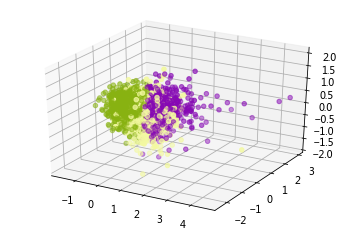

In [41]:
plt.figure
from itertools import cycle
cycol = cycle('bgrcmk')
from random import randint
color = '#{:06x}'.format(randint(0, 256**3))
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

label1 = ['#{:06x}'.format(randint(0, 256**3)) for i in range(60)]
color = [label1[i] for i in labels]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datapoint[:, 0], datapoint[:, 1], datapoint[:, 2], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)

plt.show()


In [46]:
cluster_centers = kmeans_model.cluster_centers_
cluster_centers

array([[ 3.22179496e-03, -3.28391790e-03, -4.15237062e-03,
         2.06363909e-02,  3.75612676e-02, -1.43112494e-02,
        -2.07014605e-02, -3.95646431e-02, -2.17183288e-02,
         3.48364934e-02, -8.30577500e-03, -3.99294831e-02,
         1.50023075e-02, -2.71443445e-02,  2.91601829e-02,
         1.30231567e-02, -1.93083659e-02,  1.10154729e-02,
         2.55047008e-02, -3.06065660e-02, -7.24774003e-02,
         1.57015398e-03, -3.26826563e-03, -1.71219483e-02,
        -1.49159953e-02, -3.82619351e-03,  1.60711259e-02,
        -2.06005927e-02, -4.16458026e-03, -1.36618447e-02,
        -4.38951962e-02, -1.76381953e-02,  2.56257951e-02,
         4.77210283e-02,  1.01598855e-02, -1.34704262e-02,
         6.33116160e-03, -2.54073739e-03, -4.86865640e-02,
        -2.83195805e-02, -2.78460234e-03, -7.68430531e-04,
        -2.72866730e-02,  3.47924978e-02,  2.47306209e-02,
        -6.34532794e-03,  3.66953090e-02, -3.24835889e-02,
        -3.22258100e-02,  5.07574864e-02, -8.61735828e-0

In [53]:
def findLabelx(i):
    import pandas as pd
    labelseries = pd.Series(kmeans_model.labels_)
    label_x = labelseries[labelseries.values == i]
    
    print("类别为{}的数据\n".format(i),(traindata_df.iloc[label_x.index]))
    return label_x
n_cluster = 3
dicts = {}
for i in range(n_cluster):
    print(findLabelx(i))
    dicts[i] = len(findLabelx(i))
dicts 

类别为0的数据
                                                    comm  lens
0                               开车 稳稳 新车 第一次 做 期待 下次 合作   NaN
1                            师傅 真的 超好 非常 礼貌 健谈 期待 再次 同行   NaN
2                                感谢 感谢 送 一段 路程 期待 下次 相遇   NaN
3               坐 赚 哥哥 帅人 超好 ps 钟 经理 座位 送 小吃 谢谢 谢谢 谢谢 谢   NaN
4                       提前 愿意 做 肩颈 理疗 拖迟 一会 师傅 非常 耐心 很棒   NaN
5                                 司机 差 几分钟 不能 拼车 司机 接 单   NaN
6                师傅 非常 老人 钱包 落 车上 师傅 特意 送 过去 拾金不昧 大大的 赞   NaN
8               司机 热情 聊天 东西 落 车上 热心 帮 送 回来 非常感谢 t ︶ ` s   NaN
9                                  师傅 超级 好久 木有 脾气 礼貌 健谈   NaN
10    车 主人 超级 将近 10 分钟 提醒 我出 站 厅 很多 电动车 小心 点 注意安全 觉得...   NaN
12                       朋友 说 聊 一路 旁听者 感觉 司机 和蔼可亲 可爱 好人   NaN
13                     非常 东西 很多 师傅 帮忙 搬 尽量 腾出 更 空间 放 箱子   NaN
14                     车牌 666 车 主人 666 期待 下次 同行 感谢 送到 家   NaN
15                          非常 棒 手机 没 电 师傅 耐心 等待 露宿 火车站   NaN
16               哥哥 特别 本来 不用 送 进 学校 主动 送 进去 人超 期待 再次 同行   NaN

{0: 3593, 1: 1947, 2: 1566}